<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estimating-car-locations-using-extended-Kalman-filter" data-toc-modified-id="Estimating-car-locations-using-extended-Kalman-filter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estimating car locations using extended Kalman filter</a></span><ul class="toc-item"><li><span><a href="#Statement-of-problem:" data-toc-modified-id="Statement-of-problem:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Statement of problem:</a></span></li><li><span><a href="#How-does-extended-Kalman-filter-work" data-toc-modified-id="How-does-extended-Kalman-filter-work-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How does extended Kalman filter work</a></span></li><li><span><a href="#Simple-approach" data-toc-modified-id="Simple-approach-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simple approach</a></span></li><li><span><a href="#The-class-model" data-toc-modified-id="The-class-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The class model</a></span></li></ul></li><li><span><a href="#Neural-networks-for-car-speed" data-toc-modified-id="Neural-networks-for-car-speed-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neural networks for car speed</a></span><ul class="toc-item"><li><span><a href="#Statement-of-problem:" data-toc-modified-id="Statement-of-problem:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Statement of problem:</a></span></li><li><span><a href="#The-class-model" data-toc-modified-id="The-class-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The class model</a></span></li></ul></li></ul></div>

In [1]:
%reset -f

# Estimating car locations using extended Kalman filter 

Name: Davoud Hejazi

## Statement of problem:

Given:
1. car traveling at car_speed m/s with a variance of car_speed_variance. 
2. the gps location of gps_locations with variance of gps_variance is being recorded.

Objective: 
1. Produce the result of the cars location given processing by an extended Kalman filter.

![car_gps](car_gps.png)

## How does extended Kalman filter work

In the Extended Kalman Filter (EKF), the matrices P, H, Q, and R need to be initialized before the filter can start estimating the state of a system. Here's how to initialize each matrix:

1. The P matrix represents the uncertainty or covariance of the state estimates. It should be initialized with a large value to reflect the initial uncertainty. A common way to do this is to set P to a diagonal matrix with large values along the diagonal. The specific values depend on the system being modeled and should be chosen based on the prior knowledge of the system.

2. The H matrix is the measurement model or observation matrix. It maps the state estimate to the predicted measurement. It depends on the specific system being modeled and should be defined accordingly.

3. The Q matrix is the process noise covariance matrix. It represents the uncertainty or noise in the system dynamics. The specific values depend on the system being modeled and should be chosen based on the prior knowledge of the system.

4. The R matrix is the measurement noise covariance matrix. It represents the uncertainty or noise in the sensor measurements. The specific values depend on the sensors being used and should be chosen based on the calibration of the sensors.

5. The state transition matrix F relates the state at the previous time step to the state at the current time step in a linear form. Specifically, it defines the relationship between the state at time k and the state at time k-1. 

Once these matrices are initialized, the EKF can start estimating the state of the system by iteratively predicting the state, comparing it with the measurements, and updating the state estimate using the Kalman gain.

In the extended Kalman filter (EKF), the state transition matrix, denoted as F, and the state covariance matrix, denoted as P, are both important components in the prediction step of the filter.

The state transition matrix F relates the state at the previous time step to the state at the current time step in a linear form. Specifically, it defines the relationship between the state at time k and the state at time k-1. The matrix F can be computed based on the system's dynamic model, which describes the behavior of the system being modeled by the Kalman filter.

On the other hand, the state covariance matrix P describes the uncertainty in the estimate of the state. It represents the covariance between the elements of the state vector, and it is updated at each time step based on the predicted state and the measurement data. The matrix P is initialized at the start of the filter with some initial estimate of the state uncertainty.

In summary, the state transition matrix F describes the linear dynamics of the system being modeled, while the state covariance matrix P represents the uncertainty in the estimated state. Both matrices are used in the prediction step of the EKF to update the predicted state and the associated uncertainty estimate.

## Simple approach

Hint: This is a simple approach to solve the problem but the reader is advised to see the class model, and the neural networks model that are provided later.

<br>To use an Extended Kalman Filter (EKF) for position estimation of a car based on its speed and GPS location data, we can use the following steps:

1. Define the state vector and measurement vector:
The state vector, x, includes the car's position, velocity, and acceleration, and is defined as: 
$x = [position_x, position_y, velocity_x, velocity_y, acceleration_x, acceleration_y]$

2. The measurement vector, z, includes the GPS location and the speed of the car, and is defined as: 

    z = [gps_location_x, gps_location_y, car_speed]

3. Define the state transition function:
The state transition function, f(x), predicts the state of the car at the next time step based on the current state and the elapsed time. In this case, the elapsed time can be estimated using the time difference between the current and previous GPS measurements. Assuming a constant velocity model, the state transition function can be defined as:
$f(x) = [position_x + velocity_x * dt, position_y + velocity_y * dt, velocity_x, velocity_y, acceleration_x, acceleration_y]$

    where dt is the time difference between the current and previous GPS measurements.

4. Define the measurement function:
The measurement function, h(x), predicts the expected GPS location and car speed given the current state of the car. Assuming a linear relationship between the car's velocity and its speed, the measurement function can be defined as:
$h(x) = [position_x, position_y, sqrt(velocity_x^2 + velocity_y^2)]$

5. Define the Jacobian matrices:
The Jacobian matrix of the state transition function, F, and the Jacobian matrix of the measurement function, H, are used to linearize the nonlinear equations for use in the EKF. They can be computed as follows:

    F = [1 0 dt 0 0 0; 0 1 0 dt 0 0; 0 0 1 0 0 0; 0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1]

    H = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 velocity_x / sqrt(velocity_x^2 + velocity_y^2) velocity_y / sqrt(velocity_x^2 + velocity_y^2) 0 0]

6. Define the process noise and measurement noise matrices:
The process noise matrix, Q, and the measurement noise matrix, R, are used to model the uncertainty in the system and the sensors, respectively. Assuming that the position and velocity of the car are uncorrelated, we can define Q and R as diagonal matrices:

    Q = [dt^4/4 0 dt^3/2 0 0 0; 0 dt^4/4 0 dt^3/2 0 0; dt^3/2 0 dt^2 0 0 0; 0 dt^3/2 0 dt^2 0 0; 0 0 0 0 car_speed_variance 0; 0 0 0 0 0 car_speed_variance]

    R = [gps_variance 0 0; 0 gps_variance 0; 0 0 car_speed_variance]

7. Implement the EKF algorithm:
The EKF algorithm consists of the following steps:
a. Initialize the state vector and the covariance matrix, P:
Assuming that the initial position of the car is given by the first GPS measurement and the initial velocity and acceleration are zero, we can

In [2]:
import numpy as np

def ekf_position_estimation(measurements, initial_estimate, car_speed, car_speed_variance, gps_variance):
    # state transition matrix
    dt = 1
    F = np.array([[1, dt], [0, 1]])
    
    # measurement function
    H = np.array([[1, 0]])
    
    # process noise covariance matrix
    Q = np.array([[dt**4/4, dt**3/2], [dt**3/2, dt**2]]) * car_speed_variance
    
    # measurement noise covariance matrix
    R = np.array([[gps_variance]])
    
    # Initialize the state estimate and error covariance matrix
    x_hat = initial_estimate
    P = np.zeros((2, 2))
    
    # Apply the extended Kalman filter to estimate the car's position
    for z in measurements:
        # Predict the state and error covariance matrix using the state transition matrix and process noise
        x_hat_minus = np.dot(F, x_hat)
        P_minus = np.dot(np.dot(F, P), F.T) + Q
        
        # Update the state estimate and error covariance matrix using the measurement and measurement noise
        y = z - np.dot(H, x_hat_minus)
        S = np.dot(np.dot(H, P_minus), H.T) + R
        K = np.dot(np.dot(P_minus, H.T), np.linalg.inv(S))
        x_hat = x_hat_minus + np.dot(K, y)
        P = np.dot((np.eye(2) - np.dot(K, H)), P_minus)
        
    return x_hat[0]

To use this function, you would need to pass in the following parameters:

1. measurements: a list of GPS measurements of the car's position.
2. initial_estimate: a two-element list or numpy array representing the initial estimate of the car's position and velocity.
3. car_speed: the constant speed of the car in meters per second.
4. car_speed_variance: the variance of the car's speed.
5. gps_variance: the variance of the GPS measurements.

For example, you could call the function like this:

In [3]:
measurements = [10.2, 12.1, 14.3, 16.7, 18.9]
initial_estimate = np.array([10, 0])
car_speed = 5
car_speed_variance = 0.1
gps_variance = 0.5

position_estimate = ekf_position_estimation(measurements, initial_estimate, car_speed, car_speed_variance, gps_variance)

print(position_estimate)

18.492711413952573


## The class model

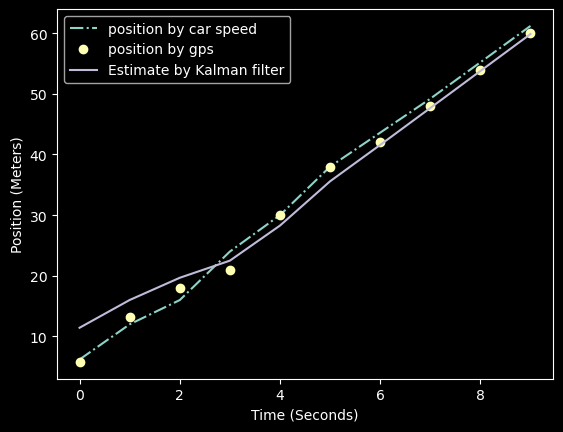

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

class problem_one:
    
    def __init__(self, car_location_variance, car_speeds_variance, gps_variance):
        self.car_location_variance = car_location_variance
        self.car_speeds_variance = car_speeds_variance
        self.gps_variance = gps_variance
        
        #you will need P_init, P H, Q matricies and R vector
        #https://en.wikipedia.org/wiki/Extended_Kalman_filter#Discrete-time_predict_and_update_equations
        #feel free to use research ANY online resource and code examples
        
        # Initialize P, H, Q, R matrices
        # Define the state covariance matrix
        self.P = np.diag([self.car_location_variance, self.car_speeds_variance]) 
        # Define the measurement function
        self.H = np.array([[1, 0]]) 
        # Define the process noise covariance matrix
        self.Q = np.diag([self.car_location_variance, self.car_speeds_variance]) 
        # Define the measurement noise covariance matrix
        self.R = np.array([[self.gps_variance]]) 

    def ekf_position_estimation(self, car_speeds, gps_locations, dt):
        N = len(car_speeds)

        # Initialize the state vector and state transition matrix
        x = np.array([[gps_locations[0], car_speeds[0]]]).T
        # state transition matrix
        self.F = np.array([[1, dt], [0, 1]]) 
        self.P_store = [self.P]

        estimated_positions = []
        for i in range(N):
            
            """
            The predict and update steps below are inspired from the wikipedia page 
            that was provided earlier:
            https://en.wikipedia.org/wiki/Extended_Kalman_filter#Discrete-time_predict_and_update_equations
            """
            
            # Predict step
            x = self.F @ x
            self.P = self.F @ self.P @ self.F.T + self.Q

            # Update step
            y = gps_locations[i] - self.H @ x
            S = self.H @ self.P @ self.H.T + self.R
            K = self.P @ self.H.T @ np.linalg.inv(S)
            x = x + K @ y
            self.P = (np.eye(2) - K @ self.H) @ self.P
            
            self.P_store.append(self.P)
            estimated_positions.append(x[0, 0])

        return estimated_positions #, self.P_store

    def reveal_problem_one_result(self, car_speeds, gps_locations, dt):
        # problem 1 result
        out = self.ekf_position_estimation(car_speeds, gps_locations, dt)
        plt.plot(car_speeds.cumsum() * dt, '-.', label='position by car speed')
        plt.plot(gps_locations, 'o', label='position by gps')
        plt.plot(out, label='Estimate by Kalman filter')
        plt.legend()
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position (Meters)')
        plt.show()
#         return P_store

if __name__ == "__main__":
    # given
    car_location_variance = 0.01
    car_speeds_variance = 0.1  # m/s
    gps_variance = 1.2

    car_speeds = np.array([6.2, 5.8, 4, 8., 6., 8., 5.6, 5.6, 6., 6.])  # m/s
    gps_locations = np.array([5.8, 13.2, 18, 21., 30., 38., 42., 48., 54., 60.])
    dt = 1  # seconds

    p1_obj = problem_one(car_location_variance, car_speeds_variance, gps_variance)
    p1_obj.reveal_problem_one_result(car_speeds, gps_locations, dt)
#     print(P_store)

# Neural networks for car speed

## Statement of problem:

Given:
  1. the inputs/modified inputs car_speed and gps_locations and results from problem one as input for training
  2. a neural network library that can be installed from pip
  3. a test data set
  
Objective: 
  1. make class problem_three inherit from class 1
  2. Predict the output of the EKF given inputs described using a neural network


## The class model

2023-05-02 18:22:38.213887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


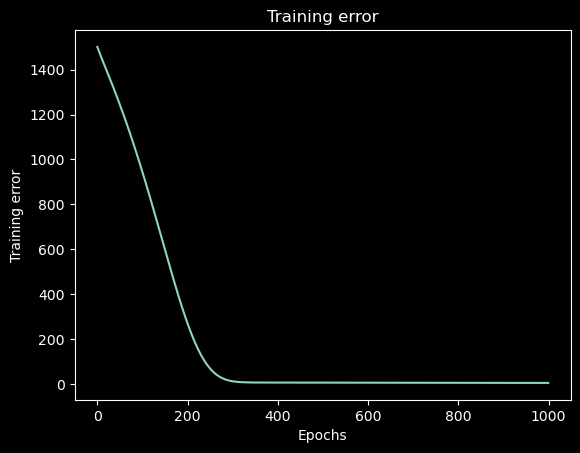

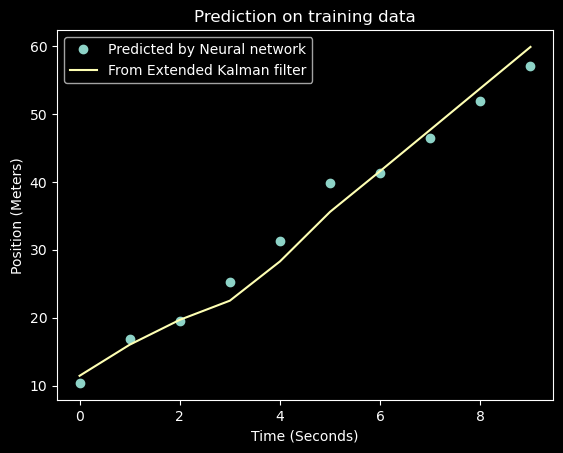

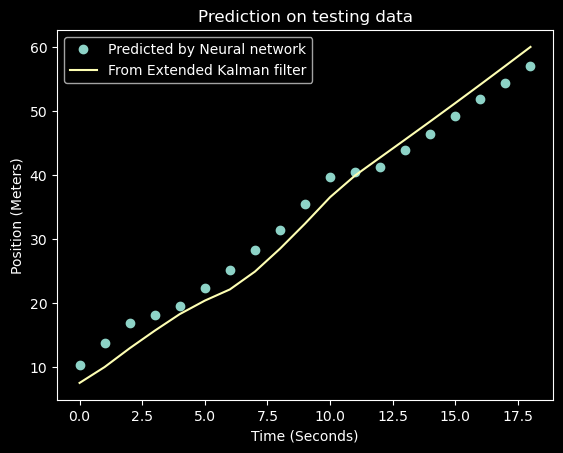

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# setting the random seed
np.random.seed(37)

#in a jupyter notebook if you have run the above cells problem one will be in the memory
#to inherit from
class problem_three(problem_one): #needs to inherit
    def __init__(self, car_location_variance, car_speed_variance, gps_variance):
        super().__init__(car_location_variance, car_speed_variance, gps_variance)
#     pass
    def train_NN_and_show(self, car_speeds_train, gps_locations_train, dt_train,
                          car_speeds_test, gps_locations_test, dt_test):
        # Training data output by Extended kalman filter
        out_train = self.ekf_position_estimation(car_speeds_train, gps_locations_train, dt_train)
        out_train = np.array(out_train)
        
        # Reshape the input data
#         X_train = np.array([car_speeds_train.tolist(),gps_locations_train.tolist()]).T
        X_train = np.concatenate([car_speeds_train.reshape(-1,1), gps_locations_train.reshape(-1,1)], axis=1)
        Y_train = out_train.reshape(-1,1)

        # Define the model here
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, activation='relu', input_dim=2),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1)
        ])

        # Compile the model here
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Training
        history = model.fit(X_train, Y_train, epochs=1000, validation_data=(X_train, Y_train), verbose=False)

        plt.figure()
        plt.plot(history.history['loss'])
        plt.title("Training error")
        plt.xlabel("Epochs")
        plt.ylabel("Training error")
        plt.show()

        # Predicting for  training set
        predictions_train = model(X_train)
        
        plt.figure()
        plt.plot(predictions_train, 'o', label="Predicted by Neural network")
        plt.plot(Y_train, label="From Extended Kalman filter")
        plt.title("Prediction on training data")
        plt.legend()
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position (Meters)')
        plt.show()

        # Predicting for testing set
        # Testing data output by EKF
        out_test = self.ekf_position_estimation(car_speeds_test, gps_locations_test, dt_test)
        out_test = np.array(out_test)
        # Reshape the input data
#         X_test = np.array([car_speed_test.tolist(),gps_locations_test.tolist()]).T
        X_test = np.concatenate([car_speeds_test.reshape(-1,1), gps_locations_test.reshape(-1,1)], axis=1)
        Y_test = out_test.reshape(-1,1)

        # Predict the output of the EKF using the trained neural network
        predictions_test = model(X_test)

        plt.figure()
        plt.plot(predictions_test, 'o', label="Predicted by Neural network")
        plt.plot(Y_test, label="From Extended Kalman filter")
        plt.title("Prediction on testing data")
        plt.legend()
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position (Meters)')
        plt.show()

if __name__ == "__main__":
    # given
    car_location_variance = 0.01
    car_speed_variance = 0.1  # m/s
    gps_variance = 1.2

    #training input set; use average for EKF output if you are struggling with 1
    car_speeds_train = np.array([6.2, 5.8, 4, 8., 6., 8., 5.6, 5.6, 6., 6.])  # m/s
    gps_locations_train = np.array([5.8, 13.2, 18, 21., 30., 38., 42., 48., 54., 60.])
    dt_train = 1  # seconds

    #testing dataset
    car_speeds_test = np.array([6.2, 6., 5.8, 4.9, 4., 6., 8., 7., 6., 7., 8., 6.8, 5.6, 5.6, 5.6, 5.8, 6., 6., 6.])
    gps_locations_test = np.array([ 5.8,  9.5, 13.2, 15.6, 18., 19.5, 21., 25.5, 30., 34., 38., 40., 42., 45., 48., 51., 54., 57., 60.])
    dt_test = 0.5 # seconds

    #p1 = problem_one(1, 2, 3)
    p3_obj = problem_three(car_location_variance, car_speed_variance, gps_variance)

    p3_obj.train_NN_and_show(car_speeds_train, gps_locations_train, dt_train,
                    car_speeds_test, gps_locations_test, dt_test)